# (단변량 같은)이변량 분석

---

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('font', family='Malgun Gothic') # 한글 폰트 적용
mpl.rcParams["axes.unicode_minus"] = False # 마이너스 기호 깨짐 방지
# plt.rcParams["figure.figsize"] = (20, 10) # 차트 사이즈 설정

---

# 1. 데이터 불러오기

## 1) move-emd-geo-master.shp

In [ ]:
emd_master = pd.read_csv('../../data/서울생활이동/gis-master/move-emd-master.csv')
emd_master['emd_cd'] = emd_master['emd_cd'].astype('int64')
display(emd_master.head())
display(emd_master.shape)

,sig_cd,sig_nm,emd_cd,emd_nm
0,11010,종로구,1101053,사직동
1,11010,종로구,1101054,삼청동
2,11010,종로구,1101055,부암동
3,11010,종로구,1101056,평창동
4,11010,종로구,1101057,무악동


(425, 4)

## 2) 유동인구

- 평일
- 퇴근시간대(18-22시)
- 서울내 이동

In [ ]:
move_origin = pd.read_csv('../../data/서울생활이동/preprocessing/생활이동_행정동_202201_18-22시.csv')
display(move_origin.head())
display(move_origin.shape)

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발시간
0,202201,월,18,1101053,1101053,F,0,EH,10,27.77,18
1,202201,월,18,1101053,1101053,F,15,EH,10,4.04,18
2,202201,월,18,1101053,1101053,F,15,EE,10,16.32,18
3,202201,월,18,1101053,1101053,F,15,HE,20,16.16,18
4,202201,월,18,1101053,1101053,F,15,WH,10,4.04,18


(14007446, 11)

---

# 2. 단변량 분석

In [ ]:
def eda_by(data, by, agg, **kwargs):
    """
    :param kwargs: count, figsize
    """
    data = data.groupby(by=by, as_index=False)[agg].sum()
    data = data.sort_values(by=agg, ascending=False, ignore_index=True)
    data = data[:kwargs.get('count', len(data))]
    data[agg] //= 1000

    plt.figure(figsize=kwargs.get('figsize', (10, 5)))
    sns.barplot(data=data, x=by, y=agg)
    plt.show()

## 1) 자치구별

In [ ]:
merged = pd.merge(move_origin, emd_master, left_on='출발 행정동 코드', right_on='emd_cd')

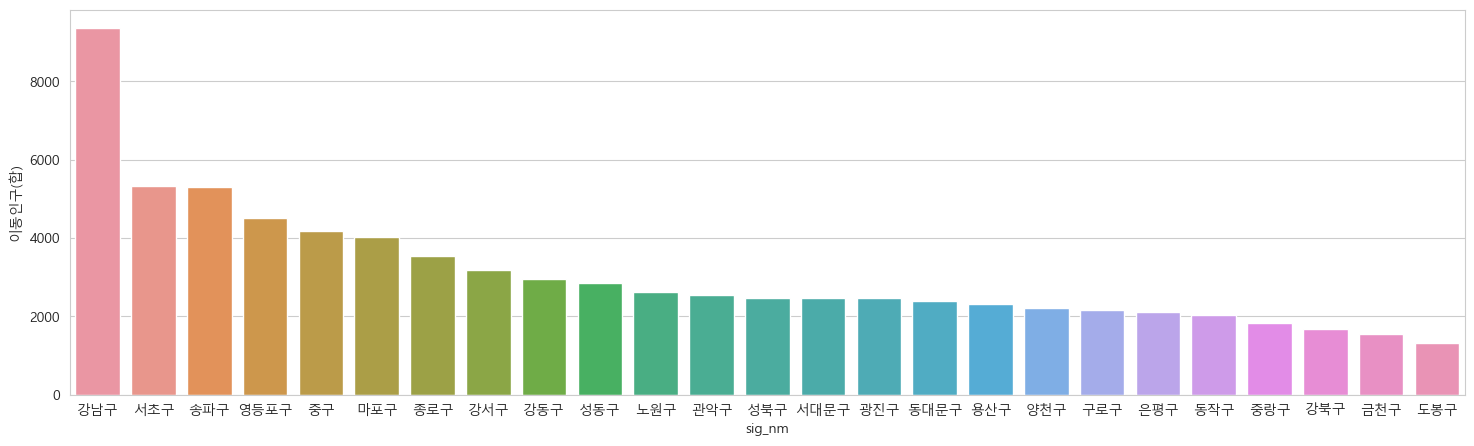

In [ ]:
eda_by(merged, by='sig_nm', agg='이동인구(합)', figsize=(18,5))

- 강남구가 유독 많다

---

## 2) 행정동별

In [ ]:
merged = pd.merge(move_origin, emd_master, left_on='출발 행정동 코드', right_on='emd_cd')

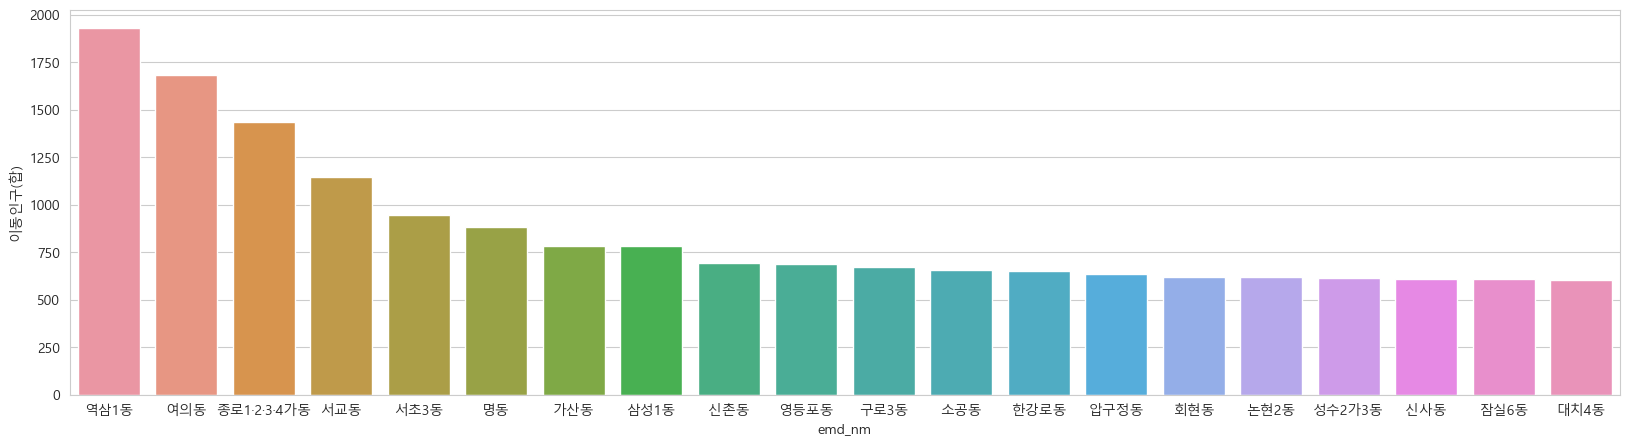

In [ ]:
eda_by(merged, by='emd_nm', agg='이동인구(합)', count=20, figsize=(20, 5))

---

## 1) 이동유형별

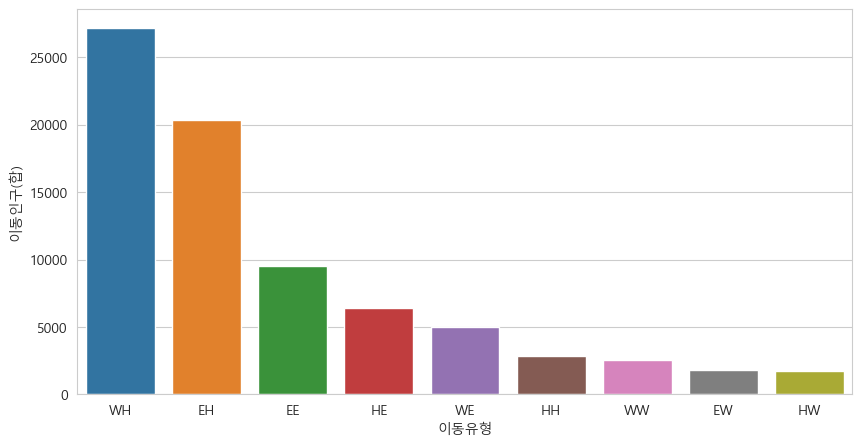

In [ ]:
eda_by(move_origin, by='이동유형', agg='이동인구(합)')

- 많음: WH(근무지->집), EH(기타->집)
- 중간: EE(기타->기타), HE(집->기타), WE(근무지->기타)

---

## 2) 출발 시간대(18 ~ 21시)

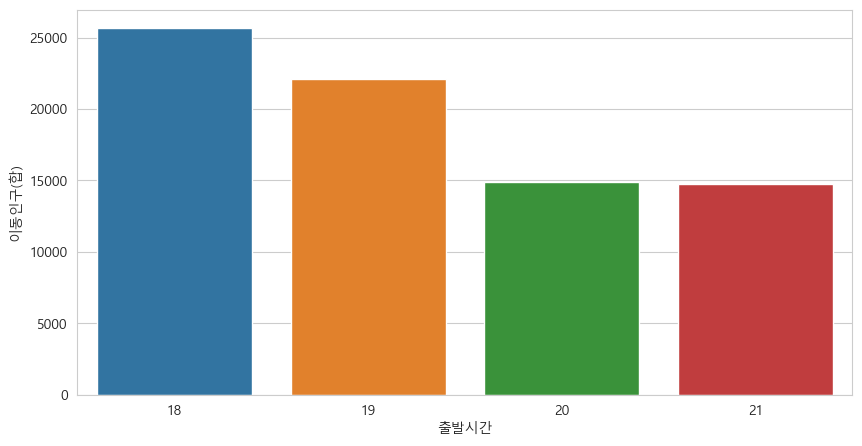

In [ ]:
eda_by(move_origin, by='출발시간', agg='이동인구(합)')

- 18시를 피크로 점점 떨어진다

---

## 3) 요일별

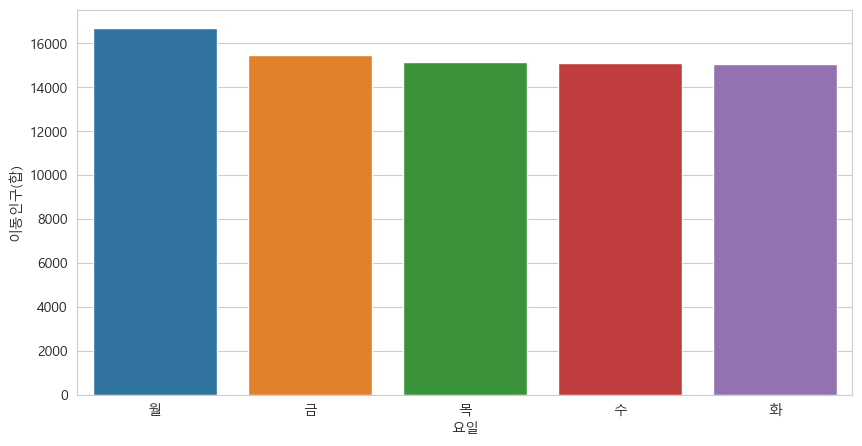

In [ ]:
eda_by(move_origin, by='요일', agg='이동인구(합)')

- 요일별 고르게 분포

---

## 4) 평균 이동시간

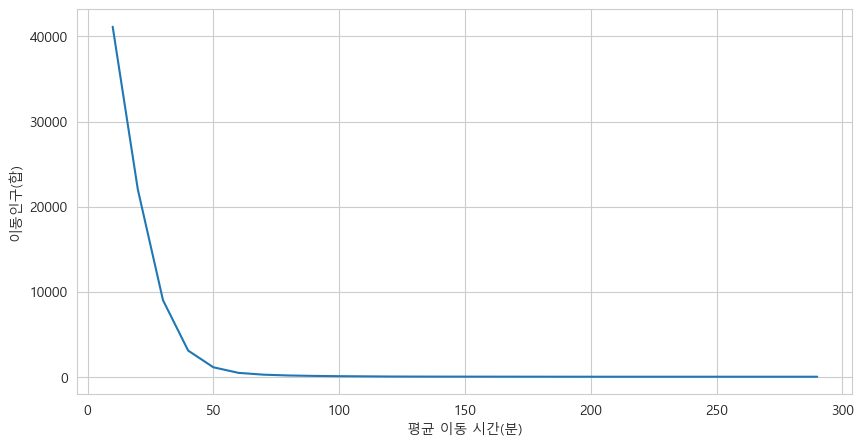

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
평균 이동 시간(분),10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,...,200.0,210.0,220.0,230.0,240.0,250.0,260.0,280.0,270.0,290.0
이동인구(합),41146.0,22007.0,8993.0,3071.0,1112.0,454.0,240.0,145.0,96.0,63.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
move_time = move_origin.groupby(by='평균 이동 시간(분)', as_index=False)['이동인구(합)'].sum()
move_time = move_time.sort_values(by='이동인구(합)', ascending=False, ignore_index=True)
move_time['이동인구(합)'] //= 1000

plt.figure(figsize=(10, 5))
sns.lineplot(data=move_time, x='평균 이동 시간(분)', y='이동인구(합)')
plt.show()

move_time.T